## Topic-Modeling-FY20-13

In this notebook we will be looking at the abstract topics in the budget documents. We will devide the data set into two data sets. One data set will contain all the budget documents that Guilford County has produced over the period of seven years. The other data set will contain the documents from the rest of the local goverments, which we are interested in.

**To access the data used in this notebook, click [here](https://drive.google.com/open?id=1-fOQX02COYCscXtJWsluxgWEVc9d_eg2).**

In [37]:
import os
import numpy as np
import pandas as pd
import re
from   pprint import pprint
import gensim
from   gensim import models
from   gensim.models import ldamodel
import spacy
import logging
import warnings
import gensim.corpora as corpora
from   gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [16]:
# Change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [4]:
df = pd.read_csv(r'CombinedData.csv', engine='python')
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [5]:
# Re-name column
df.rename(columns = {'ï»¿word':'word'}, inplace = True) 
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [56]:
#### Let's build the data sets
gc_df      = df.loc[df['organization'] == 'Guilford County', ['word', 'year']]
cc_df      = df.loc[df['organization'] == 'Charlotte City', ['word']]
dcity_df   = df.loc[df['organization'] == 'Durham City', ['word']]
dcounty_df = df.loc[df['organization'] == 'Durham County', ['word']]
mc_df      = df.loc[df['organization'] == 'Mecklenburg County', ['word']]
rc_df      = df.loc[df['organization'] == 'Raleigh City', ['word']]
wc_df      = df.loc[df['organization'] == 'Wake County', ['word']]

In [57]:
# Create series out of the word col 
corpus1 = cc_df.word
corpus2 = dcity_df.word
corpus3 = dcounty_df.word
corpus4 = mc_df.word
corpus5 = rc_df.word
corpus6 = wc_df.word

In [58]:
# For each text, join the elements and sperate them by a single space
cc_text      = ' '.join(word for word in corpus1)
dcity_text   = ' '.join(word for word in corpus2)
dcounty_text = ' '.join(word for word in corpus3)
mc_text      = ' '.join(word for word in corpus4)
rc_text      = ' '.join(word for word in corpus5)
wc_text      = ' '.join(word for word in corpus6)

In [59]:
# Let's tokenize them 
cc_tokens      = nltk.word_tokenize(cc_text)
dcity_tokens   = nltk.word_tokenize(dcity_text)
dcounty_tokens = nltk.word_tokenize(dcounty_text)
mc_tokens      = nltk.word_tokenize(mc_text)
rc_tokens      = nltk.word_tokenize(rc_text)
wc_tokens      = nltk.word_tokenize(wc_text)

In [60]:
docs = [cc_tokens, dcity_tokens, dcounty_tokens, mc_tokens, rc_tokens, wc_tokens]

In [61]:
type(docs)

list

In [62]:
len(docs)

6

In [64]:
# Create Dictionary
id2word = corpora.Dictionary(docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in docs]

# Build LDA model
ldaModel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, 
                                           passes=10, alpha = 'auto',
                                           eta = 'auto', random_state = 1)

pprint(ldaModel.print_topics())

[(0,
  '0.019*"county" + 0.017*"services" + 0.014*"budget" + 0.012*"wake" + '
  '0.010*"fund" + 0.010*"year" + 0.009*"adopted" + 0.007*"fiscal" + '
  '0.007*"capital" + 0.007*"service"'),
 (1,
  '0.017*"city" + 0.014*"fund" + 0.010*"durham" + 0.010*"services" + '
  '0.008*"program" + 0.008*"adopted" + 0.006*"general" + 0.006*"department" + '
  '0.006*"budget" + 0.006*"revenues"'),
 (2,
  '0.012*"adopted" + 0.012*"services" + 0.009*"county" + 0.008*"fund" + '
  '0.008*"capital" + 0.007*"budget" + 0.006*"service" + 0.006*"project" + '
  '0.006*"city" + 0.005*"program"'),
 (3,
  '0.014*"budget" + 0.014*"city" + 0.011*"total" + 0.011*"plan" + 0.010*"fund" '
  '+ 0.009*"services" + 0.009*"operating" + 0.008*"million" + '
  '0.007*"charlotte" + 0.007*"service"'),
 (4,
  '0.020*"county" + 0.014*"durham" + 0.010*"services" + 0.009*"budget" + '
  '0.008*"fund" + 0.007*"department" + 0.007*"program" + 0.007*"service" + '
  '0.006*"total" + 0.006*"expenditures"'),
 (5,
  '0.023*"fund" + 0.019*"ci

In [67]:
!pip install wordcloud

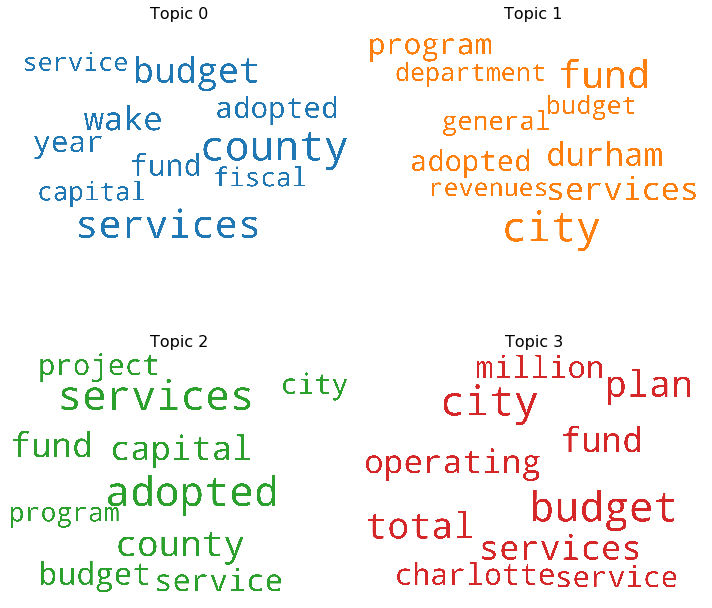

In [69]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stp_wds = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stp_wds,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldaModel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
#### Now let's 